This note book is for applyying the feature extraction capabilites from an autoencoder to the tree classification method used on the plastics data in HW5 and HW6. 

In [0]:
from google.colab import drive

drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#####imporating for the auto_encoder
from keras.models import Sequential
from keras.layers import Dense#, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [0]:
import glob
import pandas as pd

%pylab inline
import h5py
from PIL import Image
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


# Going to directory with plastics challenge data( or to place it there). The files are pulled directecty from my git repo. 

In [0]:
cd /content/gdrive/My\ Drive 

/content/gdrive/My Drive


In [0]:
cd hw6_data/

/content/gdrive/My Drive/hw6_data


In [0]:
ls 

plasticc_data_hw5/


In [0]:
cd plasticc_data_hw5/

/content/gdrive/My Drive/hw6_data/plasticc_data_hw5


In [0]:
ls

hw5_allfeatures.csv  hw_5_dat/  hw_5_dat.zip  README.md


In [0]:
####loading the training set of light curves 
lcvs = pd.read_csv("hw_5_dat/plasticc_train_lightcurves.csv")

lcvs = lcvs[:100000]
print("The dataset contains: (observations, columns)", lcvs.shape)

The dataset contains: (observations, columns) (100000, 6)


In [0]:
lcvs.tail(10) 

,object_id,mjd,passband,flux,flux_err,detected_bool
99990,53938,60212.2300,3,-5.605001,5.228561,0
99991,53938,60212.2409,4,-3.546201,4.816983,0
99992,53938,60212.2519,5,-8.969707,7.426012,0
99993,53938,60223.1948,2,-1.825551,5.096539,0
99994,53938,60223.2024,1,-4.431781,6.641129,0
99995,53938,60223.2100,3,-8.537231,5.250393,0
99996,53938,60223.2210,4,0.185793,4.947553,0
99997,53938,60223.2319,5,-2.938326,8.078253,0
99998,53938,60226.2721,2,-1.230299,4.908180,0
99999,53938,60226.2797,1,-9.662260,6.327886,0


In [0]:
#####getting the list of the filter types and lables
bands = lcvs["passband"].unique()
print("Passbands (filter) identifiers:", bands)

Passbands (filter) identifiers: [2 1 3 4 5 0]


60674.0798
59582.3282
1638


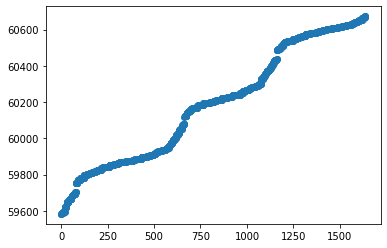

In [0]:
#lcvs.groupby(["object_id", "passband"])['object_id' == '615']

print(lcvs['mjd'].max())
print(lcvs['mjd'].min())
full_time =  np.unique(lcvs['mjd']) 
print(np.size(full_time))
full_time_index = np.arange(0,np.size(np.unique(lcvs['mjd'])))

plt.scatter(full_time_index  , np.unique(lcvs['mjd']))

In [0]:
name_objs = np.unique(lcvs['object_id'])
num_of_objs = np.size(name_objs )

print(num_of_objs)

305


In [0]:
###order of the objects counts upwards 

print(name_objs)

[  615   713   730   745  1124  1227  1598  1632  1920  1926  2072  2103
  2300  2330  2624  2677  2922  3041  3285  3423  3489  3910  4088  4132
  4171  4173  4220  4389  4595  4819  5527  6180  6266  6762  6947  7033
  7164  7315  7409  7566  7698  7703  7756  8328  8688  8745  8784  9006
  9172  9184  9203  9543  9936  9985 10321 10337 10349 10478 10586 10757
 10796 10798 11165 11359 11507 11770 11773 11931 11978 12695 12872 13079
 13138 13194 13459 13482 13504 14080 14156 14279 14398 14539 14553 14601
 14674 14983 15002 15251 15475 15626 15674 15700 15718 15845 15968 16339
 16349 16463 16496 16802 16983 17094 17172 17285 17366 17370 17515 18029
 18507 18556 18645 18706 18937 18952 19154 19213 19866 20567 20934 21335
 22184 22574 22901 23116 23127 23299 23373 23396 23409 23539 23795 23822
 23848 23857 23931 24193 24236 24592 24849 24903 24947 24989 25003 25039
 25474 25529 25577 25783 25920 25925 26161 26338 26352 26401 26531 26660
 26783 27124 27339 27941 28220 28301 28391 28636 28

In [0]:
#lcvs[lcvs['mjd']==615, lcvs['passband']== 2]
#b =  lcvs.groupby(["object_id", "passband"]).size()


72

In [0]:
#time_test_615 = lcvs[(lcvs['object_id']==130779836) & (lcvs['passband']== 2)]

In [0]:
#np.size(time_test_615)

150

In [0]:
#time_test_615['mjd'].max()  - time_test_615['mjd'].min()  


826.7339999999967

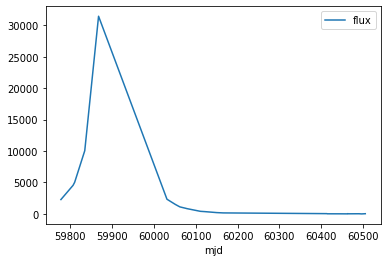

In [0]:
#time_test_615.plot(x='mjd', y='flux')

In [0]:
#time_test_ind = np.where(full_time == )

In [0]:
###shifting the mjd to start at 0 for the first observation in each filter
def t_shifter(df):
    df_new_t = (df - df.min()) 
    return df_new_t 

In [0]:
####there is no official python function to round to .5 but there was a 
#### routine on stackoverflow
def mjd_round(m, base=0.5):
    return base * round(m/base) 

In [0]:
lcvs["mjd_new"] = lcvs.groupby(["object_id", "passband"])["mjd"].apply(t_shifter)

In [0]:
lcvs["mjd_new_rnd"] = lcvs.groupby(["object_id", "passband"])["mjd_new"].apply(mjd_round)

In [0]:
#shifter_test_615 = lcvs[(lcvs['object_id']==name_objs[0]) & (lcvs['passband']== 5)]

In [0]:
maxes_mjd = lcvs.groupby(["object_id", "passband"])["mjd_new_rnd"].max()

In [0]:
time_vector = np.arange(0.0, np.max(maxes_mjd) + 1.0, 0.5) 


1750

(1830, 1750)

In [0]:
#flux_mat[1,:] = time_vector

In [0]:
#k = numpy.intersect1d(time_vector, lcvs[(lcvs['object_id']==name_objs[4]) & (lcvs['passband']== 5)]['mjd_new_rnd'], assume_unique=True, return_indices=True )
#k[1]
flux_mat[0,:][k[1]] = lcvs[(lcvs['object_id']==name_objs[4]) & (lcvs['passband']== 5)]['flux']

In [0]:
#print(flux_mat[0,:][241])

-7.594977


In [0]:
####creating a spacely sampled light curve all for the same time vector
###Probably computationally  slow: 
#####we will place all 6 filtered light curves for given object in the same row
flux_mat = np.zeros((num_of_objs , time_vector.size * 6  ) )
flux_mat.shape 

####to keep track of the object id  and respective filter
label_tracer = np.zeros(num_of_objs, dtype= numpy.int )

###loop over number of objects 
for i in range(0, num_of_objs): 
###loop of filter index     
    for j in range(0, 6):

      ###this will be the row inded in the flux matrix 
      #obj_ind = (i * 6  + j) 
      obj_ind = i

      ####intesection will find common values of the objects time array, 
      ####to the time vector, and return their respective valeus and location
      matches = numpy.intersect1d(time_vector, lcvs[(lcvs['object_id']== \
                  name_objs[ i ]) & (lcvs['passband']== j)]['mjd_new_rnd'],\
                                    assume_unique=True, return_indices=True ) 
      
      ###quick fix is to place light curve for a given filter into it own array
      l_curve_j = np.zeros(time_vector.size) 

      l_curve_j[matches[1]] = lcvs[(lcvs['object_id']==name_objs[ i ])\
                          & (lcvs['passband']== j)]['flux']
      
      ###filling the elements of the array with the output in matches 

      flux_mat[obj_ind,:][time_vector.size * j : (time_vector.size * \
                      (j + 1))] = l_curve_j  
      
      label_tracer[obj_ind] = name_objs[ i ]
    

    

The thins to rememeber about the flux matrix is that it rows are ordered  by object id (arranged in numerical order) and then by passband band number. Same structure as using the group by we already used. 

In [0]:
print(flux_mat.shape)
print(label_tracer.shape)   


(305, 10500)
(305,)


In [0]:
light_curve_mat = np.column_stack((label_tracer, flux_mat))


In [0]:
print(light_curve_mat.shape)
print(light_curve_mat)

(305, 10501)
[[ 6.150000e+02  6.878784e+00  0.000000e+00 ...  0.000000e+00
   0.000000e+00  0.000000e+00]
 [ 7.130000e+02  7.267655e+00  0.000000e+00 ...  0.000000e+00
   0.000000e+00  0.000000e+00]
 [ 7.300000e+02 -2.342200e+00  0.000000e+00 ...  0.000000e+00
   0.000000e+00  0.000000e+00]
 ...
 [ 5.357400e+04  8.202010e-01  0.000000e+00 ...  0.000000e+00
   0.000000e+00  0.000000e+00]
 [ 5.378200e+04 -5.277920e-01  0.000000e+00 ...  0.000000e+00
   0.000000e+00  0.000000e+00]
 [ 5.393800e+04 -2.994273e+00  0.000000e+00 ...  0.000000e+00
   0.000000e+00  0.000000e+00]]


In [0]:
flux_mat[20][2:5].size

3

In [0]:
flux_mat.shape[1]


10500

0 0
0 1
0 2
1 0
1 1
1 2


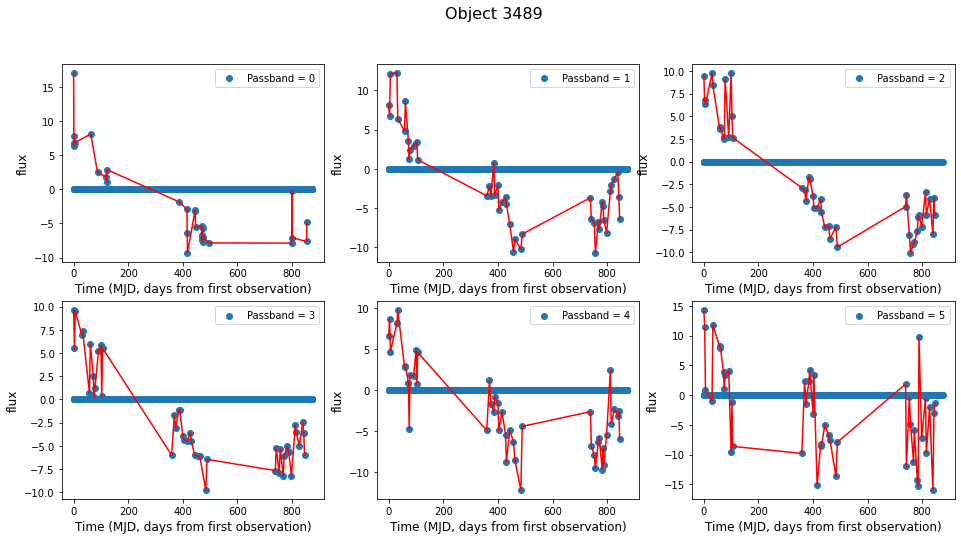

In [0]:
####plot the sparced light curve against the orignial.   
#####this is just a sanity check to make sure it worked 
obj_ind = 20

fig, ax = plt.subplots(2,3,figsize=(16,8)) 
fig.suptitle('Object ' + str(int(label_tracer[obj_ind]))\
                            , fontsize=16) 
for i in range(0,2): 
    for j in range(0,3):  
       print(i, j)
       ax[i,j].scatter(time_vector, flux_mat[obj_ind][((3* i)+ j) * time_vector.size:\
                                          ((3* i)+ j + 1) * time_vector.size],\
                                          label ='Passband = ' + str((3* i)+ j))
       
       ax[i,j].plot(lcvs[(lcvs['object_id']==label_tracer[obj_ind]) & \
                         (lcvs['passband']== (3* i)+ j)]['mjd_new_rnd'],\
                            lcvs[(lcvs['object_id']==label_tracer[obj_ind])\
                            & (lcvs['passband']== (3* i)+ j)]['flux'], c = 'r')
       
       ax[i,j].set_xlabel('Time (MJD, days from first observation)', fontsize=12) 
       ax[i,j].set_ylabel('flux', fontsize=12 ) 
       ax[i,j].legend()





###**Building the Neural Network/ Auto Encoder**

In [0]:
from sklearn.model_selection import train_test_split
X_tr,  X_test, y_tr, y_test = train_test_split( light_curve_mat, light_curve_mat , 
                                             test_size = .25, random_state=4)



In [0]:
X_tr.shape, X_test.shape, y_tr.shape, y_test.shape

((228, 10501), (77, 10501), (228, 10501), (77, 10501))

In [0]:
model_lcurve = Sequential() 
#### the encoder 
model_lcurve.add(Dense(1750,  activation='relu',input_dim= flux_mat.shape[1]))
model_lcurve.add(Dense(350, activation='relu'))
model_lcurve.add(Dense(70, activation='relu'))
#### center layer  / bottleneck 

model_lcurve.add(Dense(14, activation='relu'))

####decode

model_lcurve.add(Dense(70, activation='relu'))
model_lcurve.add(Dense(350, activation='relu'))
model_lcurve.add(Dense(1750, activation='relu'))
model_lcurve.add(Dense(flux_mat.shape[1], activation='relu')) #sigmoid

model_lcurve.compile(optimizer="adadelta", loss="mean_squared_error")


In [0]:
history_model_lcurve = model_lightcurve_sig.fit(X_tr, X_tr, 
                                       validation_data=(X_test, X_test), 
                                       epochs=20, batch_size=100, verbose=1)

In [0]:



 # model.add(Dense(1225*4, activation='sigmoid'))
  #model.compile(optimizer='adamax', loss='mse',
   #metrics=['mae', 'acc'])# optimizer="adadelta", loss="kullback_leibler_divergence")

In [0]:


#pl.plot(np.array(history64_sig.history['loss']))
#pl.ylabel('loss')
#pl.xlabel('iteration')


# you can skip this and load the saved model
#history = model.fit(X_tr, y_tr, epochs=1000, batch_size=16, verbose=1)
#model.save("imgreconstruct_1000.h5")

# READ IN THE SAVED MODEL
#!wget http://fbb.space/mltsa/imgreconstruct_10000.h5
#model.load_weights("imgreconstruct_10000.h5"